## Imports

In [1]:
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt
import copy
from mxnet import nd, autograd, gluon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:442: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:2210: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:2892: DeprecationWarning: invalid escape sequence \|
  delete = set("""~!@#$%^&*()-=+~\|]}[{';: /?.>,<""")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:190: DeprecationWarning: invalid escape sequence \S
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\patches.py:515: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:78: DeprecationWarning: invalid escape sequence \p
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:442: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:474: DeprecationWar

## Set Contexts as in GPU

In [2]:
data_ctx=mx.gpu()
model_ctx=mx.gpu()

In [6]:
def transform(data,label):
    #templabel=label.astype(np.float32)
    #print(label)
#     if templabel in range(10):
#         if templabel==1.0 or templabel==2.0:
#             return data.astype(np.float32)/255,label.astype(np.float32)
#     else:
    return data.astype(np.float32)/255,label.astype(np.float32)

In [5]:
MNIST_train=mx.gluon.data.vision.FashionMNIST(train=True,transform=transform)
MNIST_test=mx.gluon.data.vision.FashionMNIST(train=False,transform=transform)

In [7]:
MyMNIST_train12=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,3):
        MyMNIST_train12.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train12)
print(train_data_length)

MyMNIST_test12=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,3):
        MyMNIST_test12.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test12)
print(test_data_length)


MyMNIST_train123=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,4):
        MyMNIST_train123.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train123)
print(train_data_length)

MyMNIST_test123=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,4):
        MyMNIST_test123.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test123)
print(test_data_length)

MyMNIST_train1234=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,5):
        MyMNIST_train1234.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train1234)
print(train_data_length)

MyMNIST_test1234=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,4):
        MyMNIST_test1234.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test1234)
print(test_data_length)

12000
2000
18000
3000
24000
3000


## Load MNIST data

In [8]:
num_inputs=784
num_outputs=10
batch_size=64
num_examples=60000

#train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
#                                      batch_size, shuffle=True)
#test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
#                                     batch_size, shuffle=False)
    
train_data12=gluon.data.DataLoader(MyMNIST_train12,batch_size,shuffle=True)
test_data12=gluon.data.DataLoader(MyMNIST_test12,batch_size,shuffle=False)


# num_inputs=784
# num_outputs=10
# batch_size=64
# num_examples=60000

#train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
#                                      batch_size, shuffle=True)
#test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
#                                     batch_size, shuffle=False)
    
train_data123=gluon.data.DataLoader(MyMNIST_train123,batch_size,shuffle=True)
test_data123=gluon.data.DataLoader(MyMNIST_test123,batch_size,shuffle=False)

train_data123=gluon.data.DataLoader(MyMNIST_train123,batch_size,shuffle=True)
test_data123=gluon.data.DataLoader(MyMNIST_test123,batch_size,shuffle=False)

train_data1234=gluon.data.DataLoader(MyMNIST_train1234,batch_size,shuffle=True)
test_data1234=gluon.data.DataLoader(MyMNIST_test1234,batch_size,shuffle=False)

## Transfer to limited cases(eg: only 1 and 2)

Each item in mx.gluon.data.vision.MNIST is a tuple of (data, label)

## Allocate parameters

In [9]:
num_hidden=30
#weight_scale=.01
weight_scale=.005

W1=nd.random_normal(shape=(num_inputs,num_hidden),scale=weight_scale,ctx=model_ctx)
b1=nd.random_normal(shape=num_hidden,scale=weight_scale,ctx=model_ctx)

# W2=nd.random_normal(shape=(num_hidden,num_hidden),scale=weight_scale,ctx=model_ctx)
# b2=nd.random_normal(shape=num_hidden,scale=weight_scale,ctx=model_ctx)

# W3=nd.random_normal(shape=(num_hidden,num_outputs),scale=weight_scale,ctx=model_ctx)
# b3=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=model_ctx)

W2=nd.random_normal(shape=(num_hidden,num_outputs),scale=weight_scale,ctx=model_ctx)
b2=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=model_ctx)

#params=[W1,b1,W2,b2,W3,b3]
params=[W1,b1,W2,b2]
for param in params:
    param.attach_grad()
print(params[2][0])


[ 0.0013763  -0.00418942 -0.00404138  0.00146266  0.00070939 -0.00431283
  0.00104529 -0.00067148  0.009062    0.00243959]
<NDArray 10 @gpu(0)>


## Activation functions

In [10]:
def relu(X):
    return nd.maximum(X,nd.zeros_like(X))

## Softmax output

In [11]:
def softmax(y_linear):
    exp=nd.exp(y_linear-nd.max(y_linear))
    partion=nd.nansum(exp,axis=0,exclude=True).reshape((-1,1))
    return exp/partition

## The softmax cross-entropy loss function

In [12]:
def cross_entropy(yhat,y):
    return -nd.nansum(y*nd.log(yhat),axis=0,exclude=True)

def softmax_cross_entropy(yhat_linear,y):
    return -nd.nansum(y*nd.log_softmax(yhat_linear),axis=0,exclude=True)

## Define the model

In [13]:
def net(X):
    h1_linear=nd.dot(X,W1)+b1
    h1=relu(h1_linear)
    
    h2_linear=nd.dot(h1,W2)+b2
    #h2=relu(h2_linear)
    
    #yhat_linear=nd.dot(h2,W3)+b3
    return h1,h2_linear
    #return yhat_linear

## Optimizer

In [14]:
def SGD(params,lr):
    for param in params:
        param[:]=param-lr*param.grad

## Evaluation metric

In [15]:
def evaluate_accuracy(data_iterator, net):
    numerator=0.
    denominator=0.
    for i ,(data, label) in enumerate(data_iterator):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        _,output=net(data)
        predictions=nd.argmax(output,axis=1)
        numerator+=nd.sum(predictions==label)
        denominator+=data.shape[0]
    return (numerator/denominator).asscalar()

## Execute the training loop

In [16]:
epochs=10
learning_rate=.0001
smoothing_constant=.01
loss_function_data=[]
train_accuracy_data=[]
test_accuracy_data=[]
params_data=[]
activation_data=[[],[]]

activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())


for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data12):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,10)
        
   
        
        with autograd.record():
            _,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    activation_data[0].append([])
    activation_data[1].append([])
    for i in range(10):
        activation_data[0][-1].append([])
        activation_data[1][-1].append([])
    #print(label.asnumpy())
    for i, (data,label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        h1,h2=net(data)
        for j in range(len(label)):
            #print(int(label[j].asnumpy()))
            activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
            activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data12, net)
    train_accuracy=evaluate_accuracy(train_data12,net)
    temp_params=copy.deepcopy(params)
    params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    print(temp_params[0][0])

Epoch 0. Loss: 0.258469813474, Train_acc 0.971167, Test_acc 0.971

[-0.00265908  0.00205299  0.00574313 -0.00124535  0.00235072  0.00361713
 -0.00094606 -0.00415736  0.00185152  0.00035023  0.00316492  0.00625801
 -0.00529295 -0.01187132 -0.0012264  -0.01353119 -0.00981976 -0.00958396
 -0.00339424  0.00343627 -0.00151494 -0.00456961  0.00579702 -0.00137868
 -0.00335519 -0.00663204 -0.00181219 -0.00097589 -0.00223522 -0.00279996]
<NDArray 30 @gpu(0)>
Epoch 1. Loss: 0.049063880074, Train_acc 0.97925, Test_acc 0.9775

[-0.00265908  0.00205299  0.00574313 -0.00124535  0.00235072  0.00361713
 -0.00094606 -0.00415736  0.00185152  0.00035023  0.00316492  0.00625801
 -0.00529295 -0.01187132 -0.0012264  -0.01353119 -0.00981976 -0.00958396
 -0.00339424  0.00343627 -0.00151494 -0.00456961  0.00579702 -0.00137868
 -0.00335519 -0.00663204 -0.00181219 -0.00097589 -0.00223522 -0.00279996]
<NDArray 30 @gpu(0)>
Epoch 2. Loss: 0.0210384483854, Train_acc 0.979917, Test_acc 0.977

[-0.00265908  0.00205299

## Train with 1,2,3

In [17]:
epochs=10
learning_rate=.001
smoothing_constant=.01
#loss_function_data=[]
#train_accuracy_data=[]
#test_accuracy_data=[]
#params_data=[]
#activation_data=[[],[]]



activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())



for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data123):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,10)
        with autograd.record():
            _,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    activation_data[0].append([])
    activation_data[1].append([])
    for i in range(10):
        activation_data[0][-1].append([])
        activation_data[1][-1].append([])
    #print(label.asnumpy())
    for i, (data,label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        h1,h2=net(data)
        for j in range(len(label)):
            #print(int(label[j].asnumpy()))
            activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
            activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data123, net)
    train_accuracy=evaluate_accuracy(train_data123,net)
    temp_params=copy.deepcopy(params)
    params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    print(temp_params[0][0])

Epoch 0. Loss: 0.0733726409992, Train_acc 0.958056, Test_acc 0.959

[-0.00265908  0.00205457  0.00574313 -0.00124183  0.00234721  0.00360942
 -0.00094508 -0.00415781  0.00184582  0.0003541   0.00316258  0.0062638
 -0.00528743 -0.01187425 -0.0012264  -0.0135272  -0.00981976 -0.00958396
 -0.00338278  0.00343627 -0.00150597 -0.00456595  0.00579705 -0.00137193
 -0.00335508 -0.00663204 -0.00181219 -0.00097589 -0.00223274 -0.00280194]
<NDArray 30 @gpu(0)>
Epoch 1. Loss: 0.0420963082472, Train_acc 0.960889, Test_acc 0.963667

[-0.00265908  0.0020532   0.00574313 -0.00124037  0.0023506   0.0036051
 -0.00094483 -0.00415587  0.00184361  0.00035557  0.00316494  0.00626556
 -0.00528517 -0.01187624 -0.0012264  -0.0135264  -0.00981976 -0.00958396
 -0.00337589  0.00343627 -0.00150371 -0.00456519  0.00579704 -0.0013684
 -0.00335441 -0.00663204 -0.00181219 -0.00097589 -0.0022326  -0.00280458]
<NDArray 30 @gpu(0)>
Epoch 2. Loss: 0.0384485684385, Train_acc 0.963, Test_acc 0.963333

[-0.00265908  0.002045

In [18]:
epochs=10
learning_rate=.001
smoothing_constant=.01
#loss_function_data=[]
#train_accuracy_data=[]
#test_accuracy_data=[]
#params_data=[]
#activation_data=[[],[]]



activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())



for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,10)
        with autograd.record():
            _,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    activation_data[0].append([])
    activation_data[1].append([])
    for i in range(10):
        activation_data[0][-1].append([])
        activation_data[1][-1].append([])
    #print(label.asnumpy())
    for i, (data,label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        h1,h2=net(data)
        for j in range(len(label)):
            #print(int(label[j].asnumpy()))
            activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
            activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data1234, net)
    train_accuracy=evaluate_accuracy(train_data1234,net)
    temp_params=copy.deepcopy(params)
    params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    print(temp_params[0][0])

Epoch 0. Loss: 0.169263742399, Train_acc 0.842708, Test_acc 0.806333

[-0.00265969  0.00198052  0.00574313 -0.00119763  0.00250284  0.0034569
 -0.00094247 -0.00407668  0.00178004  0.00039507  0.00326873  0.00630796
 -0.00521929 -0.01194591 -0.0012264  -0.0135168  -0.00981974 -0.00958396
 -0.00315591  0.00343627 -0.00145863 -0.00455238  0.00579671 -0.00126191
 -0.00332977 -0.00663204 -0.00181219 -0.00097634 -0.00224128 -0.00290926]
<NDArray 30 @gpu(0)>
Epoch 1. Loss: 0.124929548216, Train_acc 0.893542, Test_acc 0.926333

[-0.00265958  0.001959    0.00574313 -0.0011901   0.00253264  0.0034248
 -0.00094243 -0.00405853  0.00176919  0.00040201  0.00328715  0.00631462
 -0.0052072  -0.01195863 -0.0012264  -0.01351811 -0.0098197  -0.00958396
 -0.0031093   0.00343627 -0.00145862 -0.00455233  0.00579659 -0.00124158
 -0.0033295  -0.00663204 -0.00181219 -0.00097625 -0.00224399 -0.00293382]
<NDArray 30 @gpu(0)>
Epoch 2. Loss: 0.11683073167, Train_acc 0.898583, Test_acc 0.918667

[-0.00265941  0.001

## Do Node data extraction

In [19]:
#activation_data[for different layers][index of neuron][index of label(number)]
#result[index of label]
result=[]
result.append([])
result.append([])
result.append([])
result.append([])
for i in range(33):
    result[0].append(np.mean(activation_data[0][i][1],axis=0))
    result[1].append(np.mean(activation_data[0][i][2],axis=0))
    result[2].append(np.mean(activation_data[0][i][3],axis=0))
    result[3].append(np.mean(activation_data[0][i][4],axis=0))
# for i in range(11):
#     result[2].append(np.zeros((30)))
# for i in range(11,22):
#     result[2].append(np.mean(activation_data[0][i][3],axis=0))
    



activation_value_h1=[]
activation_value_h1.append([])
activation_value_h1.append([])
activation_value_h1.append([])
activation_value_h1.append([])
#activation_value_h1.append([0]*num_hidden)
for i in range(num_hidden):
    activation_value_h1[0].append([])
    activation_value_h1[1].append([])
    activation_value_h1[2].append([])
    activation_value_h1[3].append([])
    for j in range(33):
        activation_value_h1[0][-1].append(result[0][j][i])
        activation_value_h1[1][-1].append(result[1][j][i])
        activation_value_h1[2][-1].append(result[2][j][i])
        activation_value_h1[3][-1].append(result[3][j][i])
        #print(result[j][i])
        
        
#activation_data[for different layers][index of neuron][index of label(number)]
#result[index of label]
result=[]
result.append([])
result.append([])
result.append([])
result.append([])
for i in range(33):
    result[0].append(np.mean(activation_data[1][i][1],axis=0))
    result[1].append(np.mean(activation_data[1][i][2],axis=0))  
    result[2].append(np.mean(activation_data[1][i][3],axis=0))  
    result[3].append(np.mean(activation_data[1][i][4],axis=0))  
        
# for i in range(11):
#     result[2].append(np.zeros((10)))
# for i in range(11,22):
#     result[2].append(np.mean(activation_data[1][i][3],axis=0))
    
    
activation_value_h2=[]
activation_value_h2.append([])
activation_value_h2.append([])
activation_value_h2.append([])
activation_value_h2.append([])
#activation_value_h1.append([0]*num_hidden)
for i in range(num_outputs):
    activation_value_h2[0].append([])
    activation_value_h2[1].append([])
    activation_value_h2[2].append([])
    activation_value_h2[3].append([])
    for j in range(33):
        activation_value_h2[0][-1].append(result[0][j][i])
        activation_value_h2[1][-1].append(result[1][j][i])
        activation_value_h2[2][-1].append(result[2][j][i])
        activation_value_h2[3][-1].append(result[3][j][i])
        #print(result[j][i])

In [57]:
np.zeros((30))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [65]:
len(result[2][1])

10

In [57]:
len(activation_value_h1[0][1])

33

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


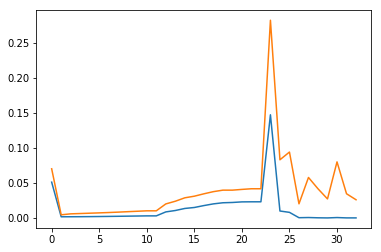

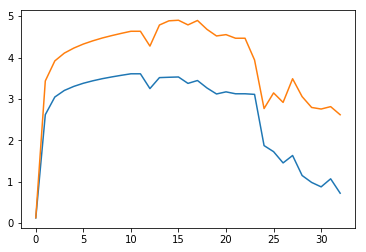

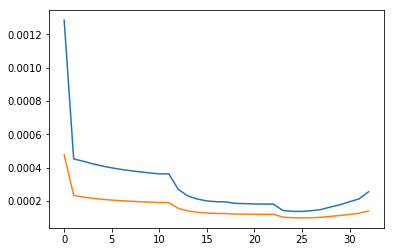

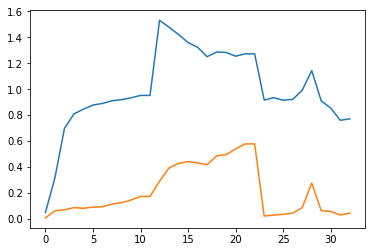

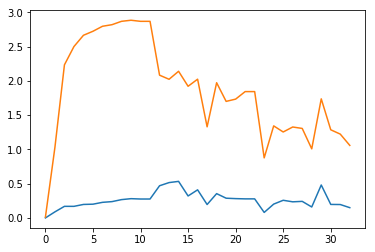

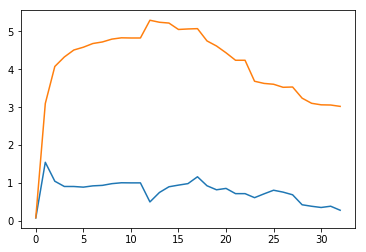

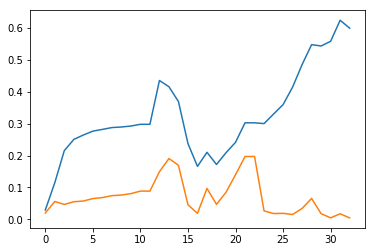

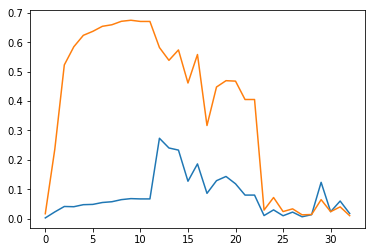

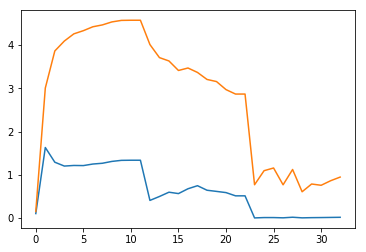

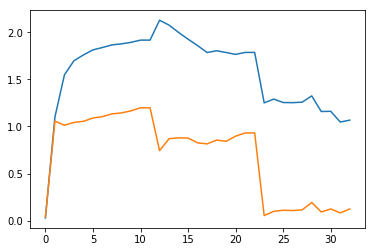

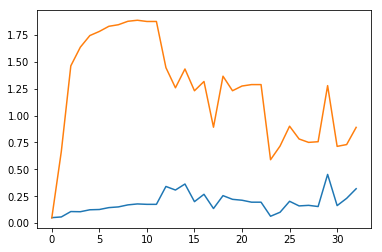

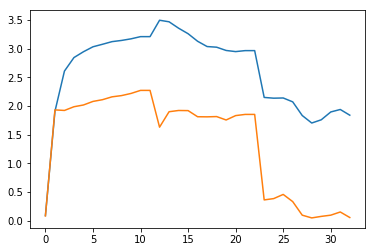

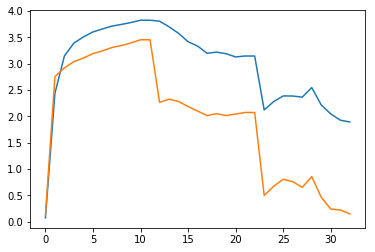

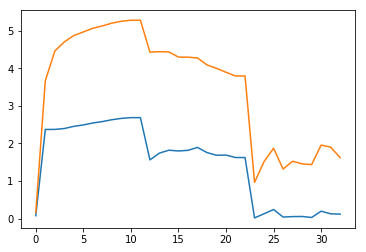

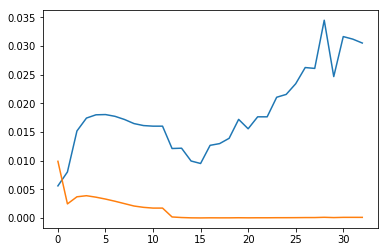

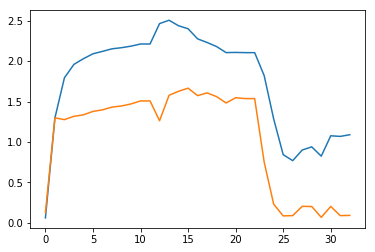

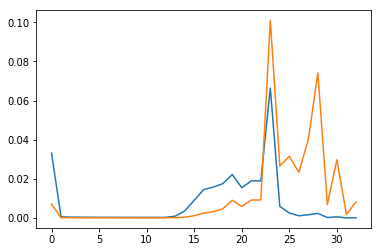

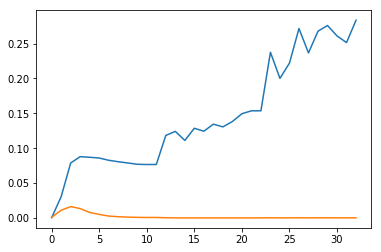

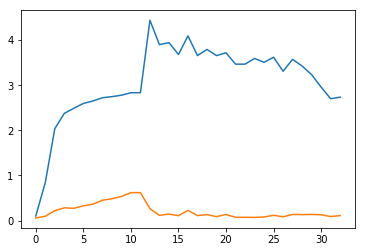

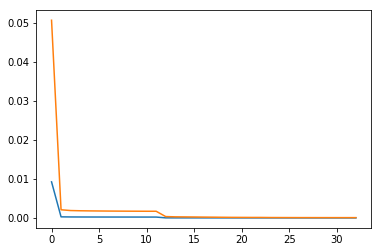

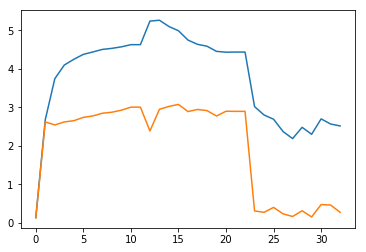

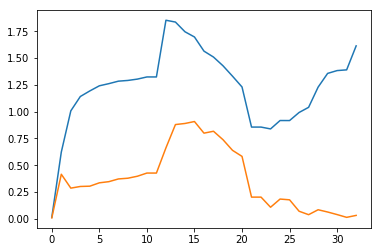

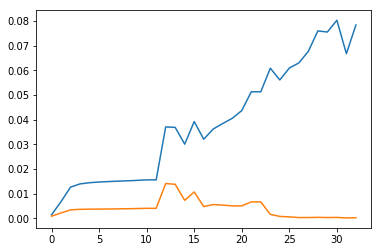

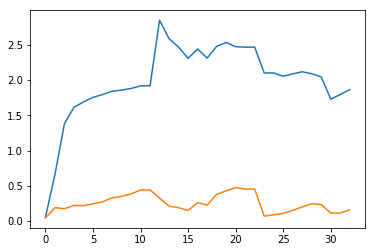

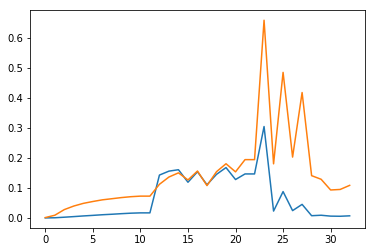

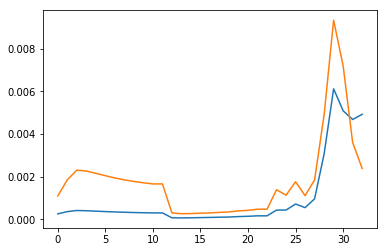

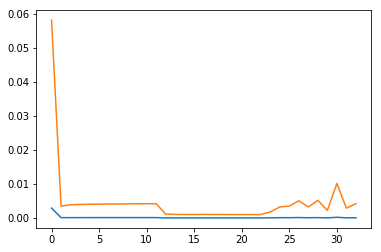

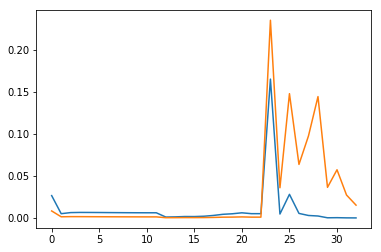

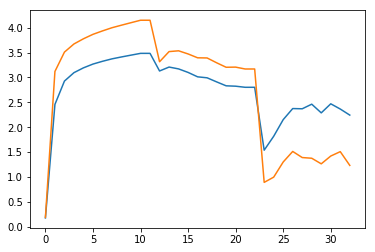

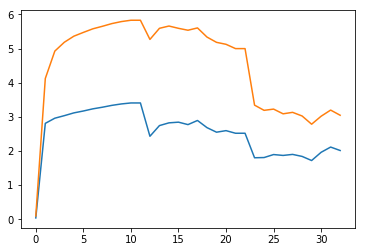

In [20]:
for i in range(num_hidden):
    plt.figure(i)
    plt.plot(range(len(activation_value_h1[0][i])),activation_value_h1[0][i])
    plt.plot(range(len(activation_value_h1[0][i])),activation_value_h1[1][i])
    #plt.plot(range(22),loss_function_data)
plt.show()

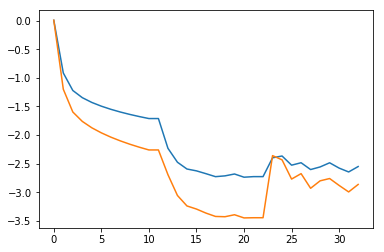

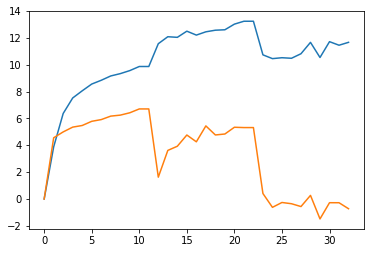

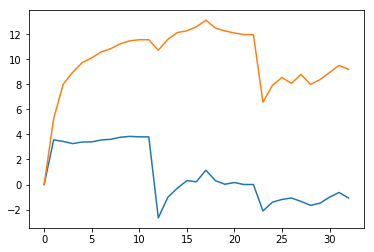

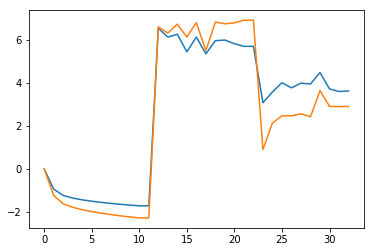

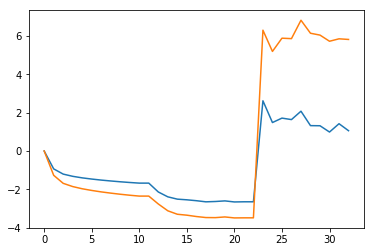

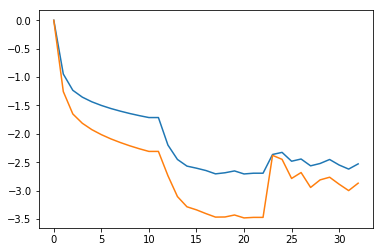

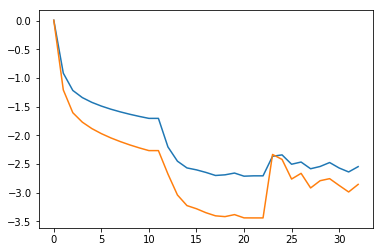

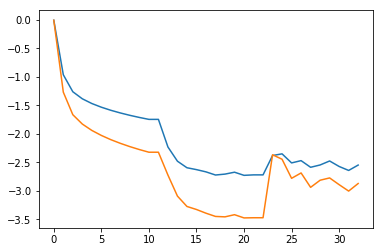

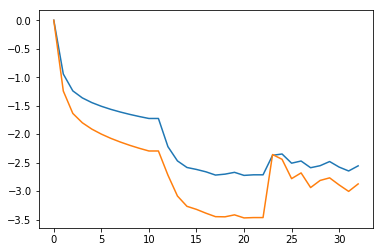

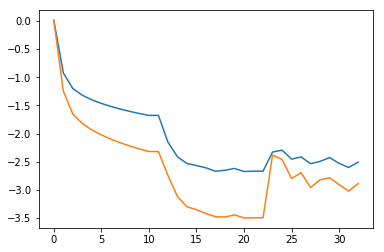

In [21]:
for i in range(num_outputs):
    plt.figure(i)
    plt.plot(range(len(activation_value_h2[0][i])),activation_value_h2[0][i])
    plt.plot(range(len(activation_value_h2[0][i])),activation_value_h2[1][i])
    #plt.plot(range(20),loss_function_data)
plt.show()

## Test Orthogonal 
Neuron activation level for label1 dot neuron activation level for label 2

In [67]:
print(activation_value_h1[0][0])
print(activation_value_h1[1][0])
print(activation_value_h1[0][1])
print(activation_value_h1[1][1])

[2.390414, 2.5085959, 2.574873, 2.619072, 2.6562457, 2.6857324, 2.7080131, 2.7292192, 2.7463212, 2.7631874, 2.0596075, 2.1248302, 2.1775961, 2.2393215, 2.2902155, 2.329325, 2.3577542, 2.3801506, 2.4090595, 2.4411526]
[3.2289736, 3.3653753, 3.4368236, 3.486696, 3.5259075, 3.5593419, 3.5812762, 3.6044111, 3.6202064, 3.6369994, 2.9411983, 2.9935234, 3.0171733, 3.0604043, 3.080704, 3.087708, 3.091588, 3.0810325, 3.082644, 3.0885098]
[0.027147731, 0.031181224, 0.033756707, 0.035733745, 0.03484584, 0.036404308, 0.037421361, 0.037668634, 0.037846345, 0.037347455, 0.050784763, 0.079685226, 0.1053391, 0.11871651, 0.099033535, 0.034622401, 0.012676775, 0.0077794916, 0.0069208709, 0.019444861]
[0.0070660347, 0.0081728939, 0.0091344239, 0.0097543877, 0.0088891685, 0.0093097659, 0.0095294276, 0.0094613349, 0.0093964702, 0.0091321245, 0.32802871, 0.35267985, 0.31201836, 0.28562921, 0.20135634, 0.093166806, 0.061177455, 0.047643144, 0.046462886, 0.095204704]


In [40]:
np.dot([1,2,3],[4,5,6])

32

In [22]:
dot_product=[]
for i in range(30):
    #dot_product.append([])
    dot_product.append(np.dot(activation_value_h1[0][i],activation_value_h1[1][i]))
# dot_result=[]
# for i in range(num_hidden):
#     dot_result.append([])
#     for j in range(20):
#         dot_result[-1].append(dot_product[j][i])
# print(dot_result[0])

In [88]:
print(dot_product)

[0.18722047, 16.012114, 0.00073380762, 0.00055857142, 69.080421, 0.30150846, 112.08687, 6.0551028, 16.16293, 52.554089, 69.921463, 9.1301661, 8.2526267e-06, 5.0714025, 21.004978, 10.129657, 3.9820986, 8.0220137, 0.18434632, 20.53076]


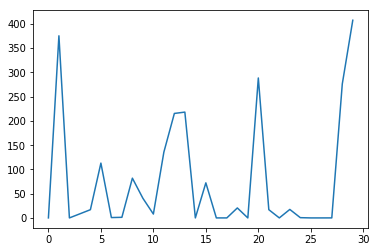

In [23]:
plt.plot(range(30),dot_product)
plt.show()

In [22]:
activation_value_h1[0][i][10]

2.1501746

## Project into 2D space with x axis number 1 and y axis number 2

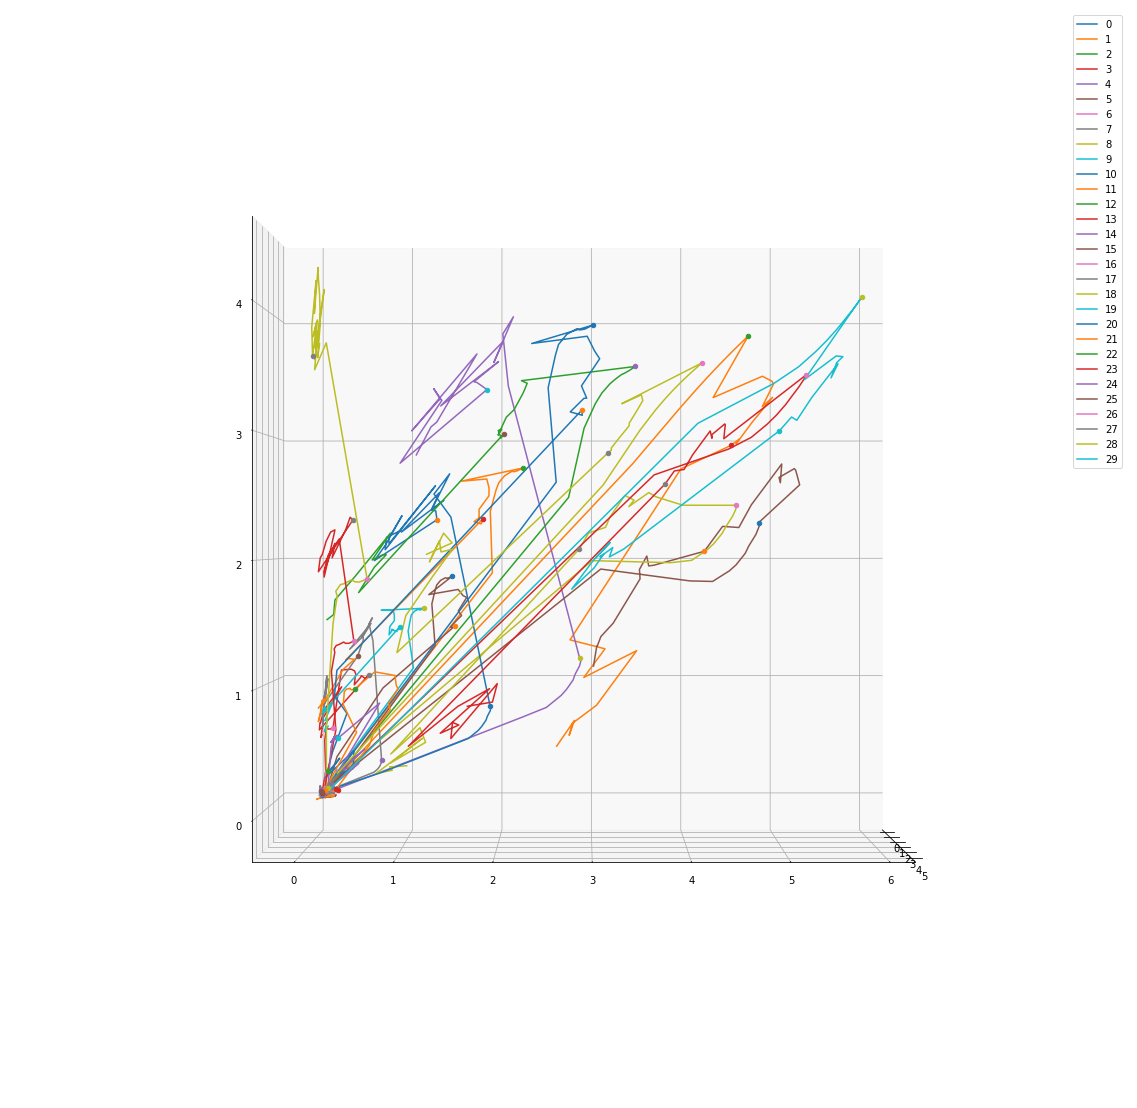

In [26]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig=plt.figure(0,figsize=(20,20))
ax=fig.gca(projection='3d')
for i in range(30):
    ax.plot(activation_value_h1[0][i],activation_value_h1[1][i],activation_value_h1[2][i],label=i)
    #plt.plot(activation_value_h1[0][i],activation_value_h1[1][i],label=i)
    ax.scatter(activation_value_h1[0][i][11],activation_value_h1[1][i][11],activation_value_h1[2][i][11],'ro',label=None)
    ax.scatter(activation_value_h1[0][i][22],activation_value_h1[1][i][22],activation_value_h1[2][i][22],'ro',label=None)
ax.legend()
ax.view_init(0, 0)
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()
# fig=plt.figure(1,figsize=(20,15))
# for i in range(10):
#     plt.plot(activation_value_h2[0][i],activation_value_h2[1][i],label=i)
#     plt.plot(activation_value_h2[0][i][11],activation_value_h2[1][i][11],'ro',label=None)
# plt.legend()


## Prediction

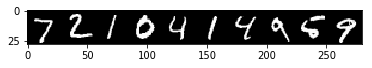

model predictions are: 
[ 7.  2.  1.  0.  4.  1.  4.  9.  6.  9.]
<NDArray 10 @gpu(0)>
true labels: 
[ 7.  2.  1.  0.  4.  1.  4.  9.  5.  9.]
<NDArray 10 @cpu(0)>


In [32]:

def model_predict(net,data):
    output=net(data)
    return nd.argmax(output,axis=1)
samples=10
sample_data=gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False,transform=transform),samples,shuffle=False)
#sample_data=mx.gluon.data.DataLoader(mnist_test,samples,shuffle=True)
for i, (data, label) in enumerate(sample_data):
    data=data.as_in_context(model_ctx)
    im=nd.transpose(data,(1,0,2,3))
    im=nd.reshape(im,(28,10*28,1))
    imtiles=nd.tile(im,(1,1,3))
    
    plt.imshow(imtiles.asnumpy())
    plt.show()
    pred=model_predict(net,data.reshape((-1,784)))
    print('model predictions are:', pred)
    print('true labels:', label)
    break